# Creating Columns using Dataframes

1. Dataframes are used when we have multiple columns or features whereas Series is used when we have only one column

Task 1: Creating sample Dataframe

In [1]:
import pandas as pd

In [11]:
Names=['ram','shyam','vineeta','sita']
science_marks=[34,45,56,89]



In [12]:
df= pd.DataFrame({'Names': Names, 'science_marks': science_marks})

In [13]:
df

,Names,science_marks
0,ram,34
1,shyam,45
2,vineeta,56
3,sita,89


Adding new columns for marks in maths subject

In [14]:
df['Maths_marks']=[42,41,40,30]
df

,Names,science_marks,Maths_marks
0,ram,34,42
1,shyam,45,41
2,vineeta,56,40
3,sita,89,30


Now, add same marks for social for all students 

In [17]:
df['social_marks']= 35
df

,Names,science_marks,Maths_marks,social_marks
0,ram,34,42,35
1,shyam,45,41,35
2,vineeta,56,40,35
3,sita,89,30,35


# Python Pandas : DropNa

Dropna() : function is used to drop any missing values from row or column from dataframe

In [1]:
import pandas as pd
import numpy as np

now creating sample dataframe

In [2]:
temprature1 = [19,23,34,38,np.nan,np.nan]
temprature2 = [25,40,20,np.nan, 45,np.nan]

In [6]:
#here np.nan means null vlaues

In [4]:
temp= pd.DataFrame({'Mumbai':temprature1,'Pune':temprature2 })

In [5]:
temp

,Mumbai,Pune
0,19.0,25.0
1,23.0,40.0
2,34.0,20.0
3,38.0,NaN
4,NaN,45.0
5,NaN,NaN


change index names to week names

In [10]:
temp.index=['Mon','tue','Wed','Thurs','Fri','Sat']
temp

,Mumbai,Pune
Mon,19.0,25.0
tue,23.0,40.0
Wed,34.0,20.0
Thurs,38.0,NaN
Fri,NaN,45.0
Sat,NaN,NaN


# Task 1: dropping all rows null values

In [11]:
temp.dropna(axis= 'rows')

,Mumbai,Pune
Mon,19.0,25.0
tue,23.0,40.0
Wed,34.0,20.0


# Task 2: dropping all columns with null values

In [13]:
temp.dropna(axis= 'columns')

""
Mon
tue
Wed
Thurs
Fri
Sat


here we can see no column is seen as output becoz all the columns have null values

# Task 2: dropping all rows with everythig as null values


In [14]:
temp.dropna(how= 'all')

,Mumbai,Pune
Mon,19.0,25.0
tue,23.0,40.0
Wed,34.0,20.0
Thurs,38.0,NaN
Fri,NaN,45.0


# threshold based removing 

In [15]:
temp.dropna(thresh= 1)

,Mumbai,Pune
Mon,19.0,25.0
tue,23.0,40.0
Wed,34.0,20.0
Thurs,38.0,NaN
Fri,NaN,45.0


In [16]:
#here sat is removed becoz it does not satisfy the criteria of atleast 1 np.nan

In [17]:
temp.dropna(thresh= 2)

,Mumbai,Pune
Mon,19.0,25.0
tue,23.0,40.0
Wed,34.0,20.0


# Mean method to fillna

In [7]:
import pandas as pd
import numpy as np

create dataframe

In [8]:
col1 = [12,43,23,np.nan, 45]
col2 = [44,33,np.nan, 40,20]
col3 = [15,np.nan,47,39,np.nan]

df = pd.DataFrame({'maths':col1 ,'Physics':col2 , 'english':col3})

In [9]:
df

,maths,Physics,english
0,12.0,44.0,15.0
1,43.0,33.0,NaN
2,23.0,NaN,47.0
3,NaN,40.0,39.0
4,45.0,20.0,NaN


In [10]:
df.index= ['ram','shyam','sita','deepa','meena']

In [11]:
df

,maths,Physics,english
ram,12.0,44.0,15.0
shyam,43.0,33.0,NaN
sita,23.0,NaN,47.0
deepa,NaN,40.0,39.0
meena,45.0,20.0,NaN


lets fill the marks of students having null values with mean of marks of other students


first lets check average score of marks in each subject

In [12]:
df.mean()

maths      30.750000
Physics    34.250000
english    33.666667
dtype: float64

parent dataframe

In [13]:
df

,maths,Physics,english
ram,12.0,44.0,15.0
shyam,43.0,33.0,NaN
sita,23.0,NaN,47.0
deepa,NaN,40.0,39.0
meena,45.0,20.0,NaN


modified dataframe

In [14]:
df.fillna(df.mean())

,maths,Physics,english
ram,12.00,44.00,15.000000
shyam,43.00,33.00,33.666667
sita,23.00,34.25,47.000000
deepa,30.75,40.00,39.000000
meena,45.00,20.00,33.666667


# Outlier Detection and Removal Pandas

In [15]:
import pandas as pd
import numpy as np

In [17]:
import matplotlib.pyplot as plt

creating dataframe

1. create a list consisting of 3 values of 5, 25 values of 50 and 1 value of 100 and 1 value of 89

2. here 100 and 89 are outliers and data is mostly concentrated at 50

In [19]:
values= [5]*3 + [50] * 25 + [100] + [89]
print(values)

[5, 5, 5, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 100, 89]


In [20]:
df= pd.DataFrame({'values':values})

In [21]:
df

,values
0,5
1,5
2,5
3,50
4,50
5,50
6,50
7,50
8,50
9,50


Lets plot the frequency count

(array([ 3.,  0.,  0.,  0., 25.,  0.,  0.,  0.,  1.,  1.]),
 array([  5. ,  14.5,  24. ,  33.5,  43. ,  52.5,  62. ,  71.5,  81. ,
         90.5, 100. ]),
 <BarContainer object of 10 artists>)

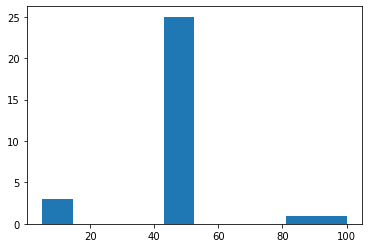

In [22]:
plt.hist(df)

now, getting the 1st percentile and 0.95 percentile value from dataset

In [24]:
firstpercentile= int(df.quantile(0.1))

In [25]:
firstpercentile     # Q1

45

In [26]:
ninetyfivepercentile= int(df.quantile(.95))

In [27]:
ninetyfivepercentile              # Q3

71

Now , lets keep the values between Q1 and Q3

In [29]:
condition1= df >= firstpercentile
condition2= df <= ninetyfivepercentile

new_df = df[condition1 & condition2]

In [31]:
new_df

,values
0,NaN
1,NaN
2,NaN
3,50.0
4,50.0
5,50.0
6,50.0
7,50.0
8,50.0
9,50.0


# Pandas Binning

Binning is when we group the values together based on the intervals

In [33]:
import pandas as pd

In [52]:
student= ['niti','ram','yug','siya','shyam','divya','dhan','shreya','amit','samit']
marks= [23, 45, 24, 36,35,49,93,48,85,67]

In [60]:
df= pd.DataFrame({'Student': student , 'marks':marks})

In [61]:
df

,Student,marks
0,niti,23
1,ram,45
2,yug,24
3,siya,36
4,shyam,35
5,divya,49
6,dhan,93
7,shreya,48
8,amit,85
9,samit,67


Now, Defining Bins

In [62]:
bins =[ 0, 50, 75, 100]

#naming bins

groups= ['fail', 'average', 'good','brilliant']

#naming groups

In [102]:
#df['Grade'] = pd.cut(df['marks'], bins, labels= groups)

In [103]:
#df['grade'] = pd.cut(df['marks'], bins, labels= groups)

# Label Encoding

As machine learning models do not understand categorical data , we have to convert it into numerical data so that our machine learning model runs better

In [68]:
import pandas as pd
import numpy as np


In [70]:
total_bills=[12.44,43,23,31,22,12,13.2]
tip=[1.4,3,2,4,2.4,3.8,2.2]
sex=['f','m','m','m','f','f','m']
day=['sun','sun','sun','sun','sun','sun','sun']
smoker=['y','n','y','y','n','y','n']
size=[2,3,4,4,2,3,2]

In [72]:
df =pd.DataFrame({'Total bills':total_bills, 'tips':tip,'sex':sex,'day':day,'smoker':smoker,'size':size})

In [73]:
df

,Total bills,tips,sex,day,smoker,size
0,12.44,1.4,f,sun,y,2
1,43.00,3.0,m,sun,n,3
2,23.00,2.0,m,sun,y,4
3,31.00,4.0,m,sun,y,4
4,22.00,2.4,f,sun,n,2
5,12.00,3.8,f,sun,y,3
6,13.20,2.2,m,sun,n,2


here we have categorical columns like sex, day ,smoker

Method to convert categorical to numerical

# method 1: get dummies

In [76]:
df1= pd.get_dummies(df['sex'])

In [77]:
df1

,f,m
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
5,1,0
6,0,1


In [78]:
# now dropping the column sex as we created the numerical data for it

In [79]:
df.drop('sex', axis=1, inplace=True)

In [80]:
df

,Total bills,tips,day,smoker,size
0,12.44,1.4,sun,y,2
1,43.00,3.0,sun,n,3
2,23.00,2.0,sun,y,4
3,31.00,4.0,sun,y,4
4,22.00,2.4,sun,n,2
5,12.00,3.8,sun,y,3
6,13.20,2.2,sun,n,2


In [81]:
# now adding the columns that we just created

In [82]:
df['m']= df1['m'].to_list()

In [83]:
df['f']= df1['f'].to_list()

In [84]:
df

,Total bills,tips,day,smoker,size,m,f
0,12.44,1.4,sun,y,2,0,1
1,43.00,3.0,sun,n,3,1,0
2,23.00,2.0,sun,y,4,1,0
3,31.00,4.0,sun,y,4,1,0
4,22.00,2.4,sun,n,2,0,1
5,12.00,3.8,sun,y,3,0,1
6,13.20,2.2,sun,n,2,1,0


In [85]:
# here new cols are added

# method 2: Using Label Encoding

In [88]:
total_bills=[12.44,43,23,31,22,12,13.2]
tip=[1.4,3,2,4,2.4,3.8,2.2]
sex=['f','m','m','m','f','f','m']
day=['sun','sun','sun','sun','sun','sun','sun']
smoker=['y','n','y','y','n','y','n']
size=[2,3,4,4,2,3,2]

In [87]:
df =pd.DataFrame({'Total bills':total_bills, 'tips':tip,'sex':sex,'day':day,'smoker':smoker,'size':size})

In [89]:
df

,Total bills,tips,sex,day,smoker,size
0,12.44,1.4,f,sun,y,2
1,43.00,3.0,m,sun,n,3
2,23.00,2.0,m,sun,y,4
3,31.00,4.0,m,sun,y,4
4,22.00,2.4,f,sun,n,2
5,12.00,3.8,f,sun,y,3
6,13.20,2.2,m,sun,n,2


importing label encoder from libraries

In [90]:
from sklearn.preprocessing import LabelEncoder

In [91]:
label_encoder= LabelEncoder()

In [92]:
label= label_encoder.fit_transform(df['sex'])

In [93]:
#this used to convert categorical data into numerical using label encoder

In [95]:
label

array([0, 1, 1, 1, 0, 0, 1])

whenever female it is gioivng 0 and for male it is giving 1

In [96]:
# now drop the sex col

In [97]:
df.drop('sex',axis=1, inplace=True)

In [98]:
df

,Total bills,tips,day,smoker,size
0,12.44,1.4,sun,y,2
1,43.00,3.0,sun,n,3
2,23.00,2.0,sun,y,4
3,31.00,4.0,sun,y,4
4,22.00,2.4,sun,n,2
5,12.00,3.8,sun,y,3
6,13.20,2.2,sun,n,2


In [99]:
# now add to original dataframe

In [100]:
df['sex']= label

In [101]:
df

,Total bills,tips,day,smoker,size,sex
0,12.44,1.4,sun,y,2,0
1,43.00,3.0,sun,n,3,1
2,23.00,2.0,sun,y,4,1
3,31.00,4.0,sun,y,4,1
4,22.00,2.4,sun,n,2,0
5,12.00,3.8,sun,y,3,0
6,13.20,2.2,sun,n,2,1
